# Ukraine Russia War Twitter Sentiment Analysis

Dataset yang kita gunakan untuk menyelesaikan tugas dari twitter sentiment analysis diperoleh dari repo kaggle. Dataset ini secara teratur sering diperbaharui dan diambil melalui media twitter. Silahkan nanti mendownload dataset melalui repo github\.

Pertama, kita akan import beberapa library python yang diperlukan didalam dataset ini untuk menyelesaikan project ini.

## 1. Import Library Python

ada beberapa library python yang digunakan antara lain pandas, seaborn, matplotlib, nltk, re, dan lain-lain

In [7]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns  # data visualization library
import matplotlib.pyplot as plt # berfungsi untuk membuat plot
from nltk.sentiment.vader import SentimentIntensityAnalyzer # berfungsi untuk melakukan sentiment analysis
from wordcloud import WordCloud, STOPWORDS,  ImageColorGenerator # berfungsi untuk membuat wordcloud
import nltk # berfungsi untuk melakukan tokenisasi
import re # berfungsi untuk melakukan regular expression
from nltk.corpus import stopwords # berfungsi untuk menghapus stopwords
import string # berfungsi untuk menghapus tanda baca atau pengolan dalam string

## 2. Membaca Dataset

Kita akan melihat struktur data mulai dari atribut dalam file hingga. kita cukup dengan memamnggil perintah __pd_read_csv__

In [14]:
# Membaca Data

data = pd.read_csv('tweets.csv') # membaca file csv
data.head(10) # menampilkan 10 data teratas

10012


In [11]:
print(data.columns)

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')


**Catatan**\
36 Atribut yang masing-masing bertipe data object. tapi kita hanya menggunakan beberapa atribut yang nantinya kita akan lakukan sentiment analysis menggunakan vader antara lain **username, tweet dan langueage**

In [17]:
# Manghapus Atribut yang tidak dibutuhkan

data = data[['username', 'tweet', 'language']] # berfungsi untuk menghapus atribut yang tidak dibutuhkan
data.head(10) # menampilkan 10 data teratas

,username,tweet,language
0,astoraaron,@Neoavatara I wonder if that will change now t...,en
1,geraldjagla1961,Russia's 100-year plan has turned to @SHES! Uk...,en
2,johnlockesgjost,@Nick_H_110177 @pauluni17 @nathaliejacoby1 Hon...,en
3,joe_yosemite,@afneil Except that Germany dived into a reces...,en
4,morreauwaldo,"@apmassaro3 You pee on Russia, you shit on it too",en
5,nerdstud,@holzmueller2 @RepRubenGallego I believe Russi...,en
6,alexand31258925,@micah_erfan @NoamKissinger The letter calls f...,en
7,ufmplatform,"Since Feb 24, 2022 #Russia attacked energy inf...",en
8,kirk_doe,@KyivIndependent And what are their thoughts f...,en
9,scriptmancer,@RnaudBertrand Germany thought they could take...,en


In [15]:
# Melihat jumlah data

print(f'Jumlah Data: {len(data)}')

Jumlah Data: 10012


## 3. Data Preprocessing

Kita akan mengecek apakah dalam dataset ini memiliki data yang null atau missing value dan menghitung jumlah data berdasrkan bahasa 

In [18]:
print(data.isnull().sum())

username    0
tweet       0
language    0
dtype: int64


Bisa kita lihat diatas bahwa pada atribut username, tweet dan language tidak memiliki data null atau missing value, jadi kita akan lanjut pada proses selanjutnya

In [19]:
# Melihat jumlah data berdasarkan bahasa
print(data['language'].value_counts())

en     9175
pt      234
qme     203
it       86
es       45
und      42
in       41
ru       27
ca       18
qht      18
fr       17
ja       16
fi       10
ar        9
zh        7
de        7
ur        7
pl        6
nl        6
ro        5
tl        5
th        4
vi        3
cs        3
et        2
el        2
hi        2
qam       2
tr        1
sv        1
ta        1
uk        1
sl        1
am        1
fa        1
ht        1
eu        1
cy        1
Name: language, dtype: int64


Jadi kebanyakan tweet berbahasa inggris

In [30]:
nltk.download('stopwords') # berfungsi untuk mengunduh stopwords atau kata yang tidak penting dalam bahasa inggris
stemmer = nltk.SnowballStemmer('english') # berfungsi untuk mengubah kata menjadi kata dasar
stopword = set(stopwords.words('english')) # berfungsi untuk menampilkan stopword berbahasa inggris dalam set atau list

def clean(text): # buat sebuah fungsi untuk data cleansing
    text = str(text).lower() # berfungsi untuk mengubah huruf menjadi huruf kecil
    text = re.sub('\[.*?\]', '', text) # berfungsi untuk menghapus tanda kurung siku
    text = re.sub('https?://\S+|www\.\S+', '', text) # berfungsi untuk menghapus tautan atau link
    text = re.sub('<.*?>+', '', text) # berfungsi untuk menghapus tanda kurung siku
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # berfungsi untuk menghapus tanda baca
    text = re.sub('\n', '', text) # berfungsi untuk menghapus tanda enter
    text = re.sub('\w*\d\w*', '', text) # berfungsi untuk menghapus angka
    text = re.sub('httpstco', '', text) # berfungsi untuk menghapusa tautan atau link
    text = [word for word in text.split(' ') if word not in stopword] # berfungsi untuk menghapus stopword
    text = " ".join(text) # berfungsi untuk menggabungkan kata
    text = [stemmer.stem(word) for word in text.split(' ')] # berfungsi untuk mengubah kata menjadi kata dasar
    text = " ".join(text) # berfungsi untuk menggabungkan kata
    return text # mengembalikan nilai text

data['tweet'] = data['tweet'].apply(clean) # berfungsi untuk melakukan data cleansing

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yudhaislamisulistya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
data.head(10) # menampilkan 10 data teratas dan sudah terlihat hasil data cleansing pada atribut tweet

,username,tweet,language
0,astoraaron,neoavatara wonder chang russia clear reliabl s...,en
1,geraldjagla1961,russia year plan turn shes ukrain cross line d...,en
2,johnlockesgjost,honesti rudi trump longer need honest tru...,en
3,joe_yosemite,afneil except germani dive recess creat uk bel...,en
4,morreauwaldo,pee russia shit,en
5,nerdstud,reprubengallego believ russia obvious wrong a...,en
6,alexand31258925,micaherfan noamkiss letter call direct negoti ...,en
7,ufmplatform,sinc feb russia attack energi infrastructur ...,en
8,kirk_doe,kyivindepend thought rebuild ukrain russia hoo...,en
9,scriptmancer,rnaudbertrand germani thought could take world...,en


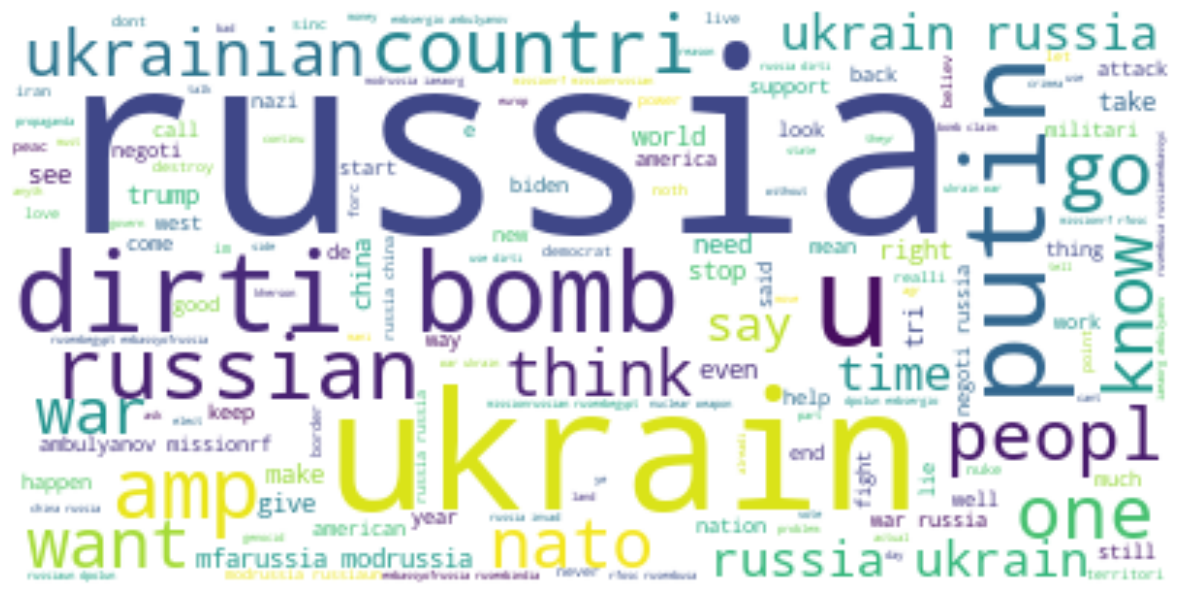

In [31]:
text = " ".join(tweet for tweet in data.tweet) # berfungsi untuk menggabungkan kata pada setiap document atau baris
stopword = set(STOPWORDS) # berfungsi untuk menampilkan stopword berbahasa inggris dalam set atau list
wordcloud = WordCloud(stopwords=stopword, background_color="white").generate(text) # berfungsi untuk membuat wordcloud
plt.figure(figsize=(15, 10)) # berfungsi untuk menentukan ukuran gambar
plt.imshow(wordcloud, interpolation='bilinear') # berfungsi untuk menampilkan gambar
plt.axis('off')
plt.show()

Kita lihat pada gambar diatas manakah kata yang sering muncul, berdasarkan gambar diatas ada beberapa kata yang sering muncul antara lain **russia, ukrain, russian, dirti bomb**

## 4. Sentiment Analysis

Sekarang kita akan menambahkan atribut positif, negatif dan netral kedalam dataset ini berdasarkan hasil kalkulasi dari sentiment score menggunakan vader

In [35]:
nltk.download('vader_lexicon') # berfungsi untuk mengunduh vader_lexicon
sentiments = SentimentIntensityAnalyzer() # berfungsi untuk melakukan sentiment analysis
data['Positif'] = data['tweet'].apply(lambda x: sentiments.polarity_scores(x)['pos']) # berfungsi untuk menentukan nilai positif
data['Negatif'] = data['tweet'].apply(lambda x: sentiments.polarity_scores(x)['neg']) # berfungsi untuk menentukan nilai negatif
data['Netral'] = data['tweet'].apply(lambda x: sentiments.polarity_scores(x)['neu']) # berfungsi untuk menentukan nilai netral

data = data[['tweet', 'Positif', 'Negatif', 'Netral']] # berfungsi untuk menghapus atribut yang tidak dibutuhkan

data.head(50)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/yudhaislamisulistya/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,tweet,Positif,Negatif,Netral
0,neoavatara wonder chang russia clear reliabl s...,0.346,0.000,0.654
1,russia year plan turn shes ukrain cross line d...,0.000,0.000,1.000
2,honesti rudi trump longer need honest tru...,0.155,0.000,0.845
3,afneil except germani dive recess creat uk bel...,0.000,0.153,0.847
4,pee russia shit,0.000,0.643,0.357
5,reprubengallego believ russia obvious wrong a...,0.150,0.292,0.558
6,micaherfan noamkiss letter call direct negoti ...,0.000,0.000,1.000
7,sinc feb russia attack energi infrastructur ...,0.000,0.219,0.781
8,kyivindepend thought rebuild ukrain russia hoo...,0.000,0.000,1.000
9,rnaudbertrand germani thought could take world...,0.111,0.000,0.889


In [36]:
print(data['tweet'][0])
print(data['tweet'][39])

neoavatara wonder chang russia clear reliabl supplier india go ask china help
grampapaish lucasfoxnew intelcrab destroy russia forev  biden start plan russian attack almost year russia invad send diplomat team convinc western alli zelenskyy threat  biden foresight result russia collap   


kita lihat untuk data pertama dengan tweet **neoavatara wonder chang russia clear reliabl supplier india go ask china help** memiliki sentiment netral sedangkan untuk data point 40 **russia call unsc ukrain dirty bomb** mengandung sentiment negatif

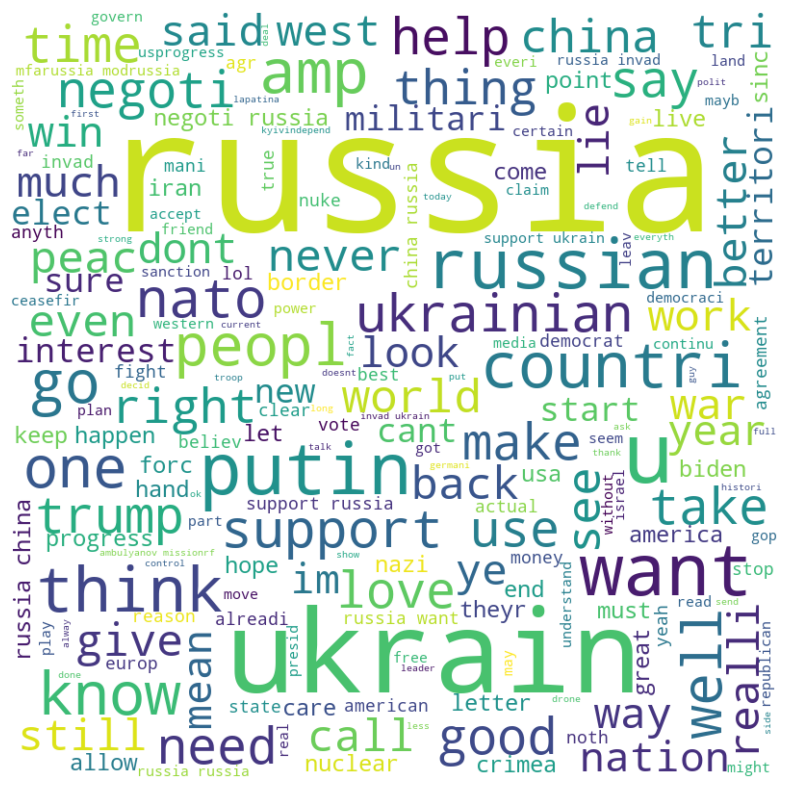

In [39]:
positive =' '.join([i for i in data['tweet'][data['Positif'] > data["Negatif"]]]) # berfungsi untuk menampilkan kata positif
stopwords = set(STOPWORDS) # berfungsi untuk menampilkan stopword berbahasa inggris dalam set atau list
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(positive) # berfungsi untuk membuat wordcloud

plt.figure(figsize=(15, 10)) # berfungsi untuk menentukan ukuran gambar
plt.imshow(wordcloud, interpolation='bilinear') # berfungsi untuk menampilkan gambar
plt.axis('off')
plt.show()

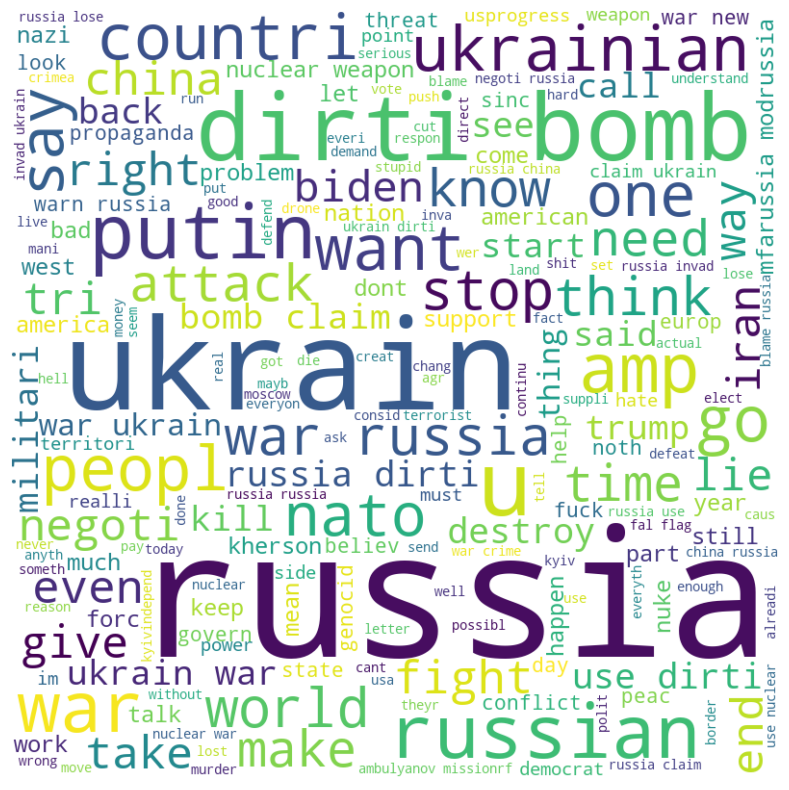

In [40]:
positive =' '.join([i for i in data['tweet'][data['Negatif'] > data["Positif"]]]) # berfungsi untuk menampilkan kata positif
stopwords = set(STOPWORDS) # berfungsi untuk menampilkan stopword berbahasa inggris dalam set atau list
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(positive) # berfungsi untuk membuat wordcloud

plt.figure(figsize=(15, 10)) # berfungsi untuk menentukan ukuran gambar
plt.imshow(wordcloud, interpolation='bilinear') # berfungsi untuk menampilkan gambar
plt.axis('off')
plt.show()

## 5. Conclusion

Ada banyak tweet tentang perang ukraina dan rusia yang dimana tweet tersebut sebenarnya banyak mengandung kalimat netral berdasarkan sentiment analysis vader\
Thanks 😊😊😊